# Coding Challenge #7

1. Calculate levered returns for Bitcoin (leverage = 4).

2. Visualize and compare with unlevered Investment.

3. Some Traders trade Bitcoin with extremely high leverage (> 100). Do you think this is a good idea (assuming no additional/advanced Risk Management Tools)? 

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

In [2]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.669998,383.614990,1.262834,1214.599976,45.900002,16804.710938
2014-10-02,124.169998,375.071991,1.262419,1214.199951,45.759998,16801.050781
2014-10-03,126.360001,359.511993,1.267058,1192.199951,46.090000,17009.689453
2014-10-04,NaN,328.865997,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.510010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.369995,39294.199219,1.224909,1901.300049,251.490005,34323.050781
2021-05-27,250.699997,38436.968750,1.219260,1895.699951,249.309998,34464.640625
2021-05-28,247.020004,35697.605469,1.219319,1902.500000,249.679993,34529.449219


In [11]:
btc = close["BTC-USD"].dropna().copy().to_frame().rename(columns = {"BTC-USD": "Price"})
btc["Returns"] = btc.Price.pct_change()
btc

,Price,Returns
Date,,
2014-10-01,383.614990,NaN
2014-10-02,375.071991,-0.022270
2014-10-03,359.511993,-0.041485
2014-10-04,328.865997,-0.085243
2014-10-05,320.510010,-0.025408
...,...,...
2021-05-26,39294.199219,0.023227
2021-05-27,38436.968750,-0.021816
2021-05-28,35697.605469,-0.071269


In [12]:
btc["Lev_Returns"] = btc.Returns.mul(4)
btc

,Price,Returns,Lev_Returns
Date,,,
2014-10-01,383.614990,NaN,NaN
2014-10-02,375.071991,-0.022270,-0.089079
2014-10-03,359.511993,-0.041485,-0.165941
2014-10-04,328.865997,-0.085243,-0.340973
2014-10-05,320.510010,-0.025408,-0.101634
...,...,...,...
2021-05-26,39294.199219,0.023227,0.092909
2021-05-27,38436.968750,-0.021816,-0.087263
2021-05-28,35697.605469,-0.071269,-0.285076


In [13]:
btc["Mad_Lev_Returns"] = btc.Returns.mul(100)
btc

,Price,Returns,Lev_Returns,Mad_Lev_Returns
Date,,,,
2014-10-01,383.614990,NaN,NaN,NaN
2014-10-02,375.071991,-0.022270,-0.089079,-2.226972
2014-10-03,359.511993,-0.041485,-0.165941,-4.148536
2014-10-04,328.865997,-0.085243,-0.340973,-8.524332
2014-10-05,320.510010,-0.025408,-0.101634,-2.540849
...,...,...,...,...
2021-05-26,39294.199219,0.023227,0.092909,2.322721
2021-05-27,38436.968750,-0.021816,-0.087263,-2.181570
2021-05-28,35697.605469,-0.071269,-0.285076,-7.126897


<Axes: xlabel='Date'>

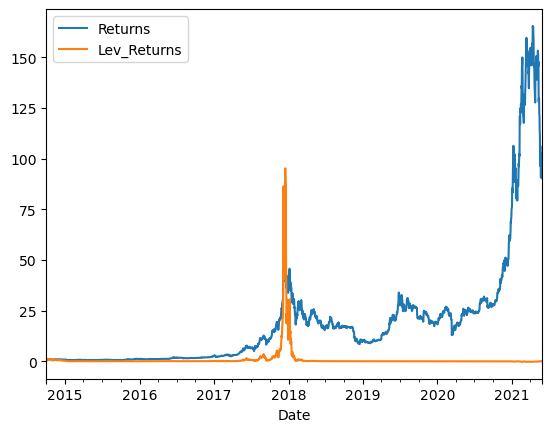

In [20]:
btc[["Returns", "Lev_Returns"]].add(1).cumprod().plot()

In [15]:
(btc.Returns.max(), btc.Lev_Returns.max(), btc.Mad_Lev_Returns.max())

(0.2524716942763181, 1.0098867771052724, 25.24716942763181)

In [16]:
(btc.Returns.min(), btc.Lev_Returns.min(), btc.Mad_Lev_Returns.min())

(-0.37169538560117077, -1.486781542404683, -37.169538560117076)

3. Some Traders trade Bitcoin with extremely high leverage (> 100). Do you think this is a good idea (assuming no additional/advanced Risk Management Tools)?

A/ No

## Practical Test 2

In [27]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format

start = "2015-01-02"
end = "2022-12-31"

symbols = ["AMZN", "MSFT", "GE", "DIS", "META", "AAPL"]

df = yf.download(symbols, start, end)
df

[*********************100%***********************]  6 of 6 completed


Adj Close                                               Close  \
                AAPL    AMZN     DIS       GE     META     MSFT     AAPL   
Date                                                                       
2015-01-02   24.5318 15.4260 87.3763 130.3897  78.4500  40.6207  27.3325   
2015-01-05   23.8407 15.1095 86.0994 127.9963  77.1900  40.2471  26.5625   
2015-01-06   23.8429 14.7645 85.6427 125.2386  76.1500  39.6564  26.5650   
2015-01-07   24.1772 14.9210 86.5188 125.2907  76.1500  40.1603  26.9375   
2015-01-08   25.1062 15.0230 87.4135 126.7995  78.1800  41.3417  27.9725   
...              ...     ...     ...      ...      ...      ...      ...   
2022-12-23  131.4771 85.2500 88.0100  63.7894 118.0400 237.6141 131.8600   
2022-12-27  129.6524 83.0400 86.3700  64.6083 116.8800 235.8524 130.0300   
2022-12-28  125.6740 81.8200 84.1700  63.9298 115.6200 233.4337 126.0400   
2022-12-29  129.2337 84.1800 87.1800  65.3181 120.2600 239.8835 129.6100   
2022-12-30  129.5527 84.0000 86.8800  65.3493 120.3400 238.6990 129.9300   

                                     ...    Open                             \
              AMZN     DIS       GE  ...     DIS       GE     META     MSFT   
Date                                 ...                                      
2015-01-02 15.4260 93.7500 150.4834  ... 94.9100 152.1648  78.5800  46.6600   
2015-01-05 15.1095 92.3800 147.7211  ... 93.2800 150.1832  77.9800  46.3700   
2015-01-06 14.7645 91.8900 144.5385  ... 92.5700 146.8804  77.2300  46.3800   
2015-01-07 14.9210 92.8300 144.5986  ... 92.7200 145.3792  76.7600  45.9800   
2015-01-08 15.0230 93.7900 146.3400  ... 93.8700 146.0397  76.7400  46.7500   
...            ...     ...      ...  ...     ...      ...      ...      ...   
2022-12-23 85.2500 88.0100  63.8486  ... 86.0600  63.7861 116.0300 236.1100   
2022-12-27 83.0400 86.3700  64.6682  ... 87.4200  64.0125 117.9300 238.7000   
2022-12-28 81.8200 84.1700  63.9891  ... 86.0800  64.7853 116.2500 236.8900   
2022-12-29 84.1800 87.1800  65.3786  ... 85.2500  64.2076 116.4000 235.6500   
2022-12-30 84.0000 86.8800  65.4098  ... 85.7300  64.7229 118.1600 238.2100   

               Volume                                                    
                 AAPL      AMZN       DIS        GE      META      MSFT  
Date                                                                     
2015-01-02  212818400  55664000   5865400   6814541  18177500  27913900  
2015-01-05  257142000  55484000   7789400   6999789  26452200  39673900  
2015-01-06  263188400  70380000   6793100  10617953  27399300  36447900  
2015-01-07  160423600  52806000   6589500   7267786  22045300  29114100  
2015-01-08  237458000  61768000   7579400   7198159  23961000  29645200  
...               ...       ...       ...       ...       ...       ...  
2022-12-23   63814900  57433700  11171600   4218845  17796600  21207000  
2022-12-27   69007800  57284000  11561400   5430800  21392300  16688600  
2022-12-28   85438400  58228600  12399500   4956830  19612500  17457100  
2022-12-29   75703700  54995900  13045100   5657408  22366200  19770700  
2022-12-30   77034200  62401200  23231000   5287584  19583800  21938500  

[2014 rows x 36 columns]

In [28]:
close = df.Close.copy()
close

,AAPL,AMZN,DIS,GE,META,MSFT
Date,,,,,,
2015-01-02,27.3325,15.4260,93.7500,150.4834,78.4500,46.7600
2015-01-05,26.5625,15.1095,92.3800,147.7211,77.1900,46.3300
2015-01-06,26.5650,14.7645,91.8900,144.5385,76.1500,45.6500
2015-01-07,26.9375,14.9210,92.8300,144.5986,76.1500,46.2300
2015-01-08,27.9725,15.0230,93.7900,146.3400,78.1800,47.5900
...,...,...,...,...,...,...
2022-12-23,131.8600,85.2500,88.0100,63.8486,118.0400,238.7300
2022-12-27,130.0300,83.0400,86.3700,64.6682,116.8800,236.9600
2022-12-28,126.0400,81.8200,84.1700,63.9891,115.6200,234.5300


In [29]:
returns = close.apply(lambda x: x.pct_change())
returns

,AAPL,AMZN,DIS,GE,META,MSFT
Date,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.0282,-0.0205,-0.0146,-0.0184,-0.0161,-0.0092
2015-01-06,0.0001,-0.0228,-0.0053,-0.0215,-0.0135,-0.0147
2015-01-07,0.0140,0.0106,0.0102,0.0004,0.0000,0.0127
2015-01-08,0.0384,0.0068,0.0103,0.0120,0.0267,0.0294
...,...,...,...,...,...,...
2022-12-23,-0.0028,0.0174,0.0155,0.0002,0.0079,0.0023
2022-12-27,-0.0139,-0.0259,-0.0186,0.0128,-0.0098,-0.0074
2022-12-28,-0.0307,-0.0147,-0.0255,-0.0105,-0.0108,-0.0103


<Axes: xlabel='Date'>

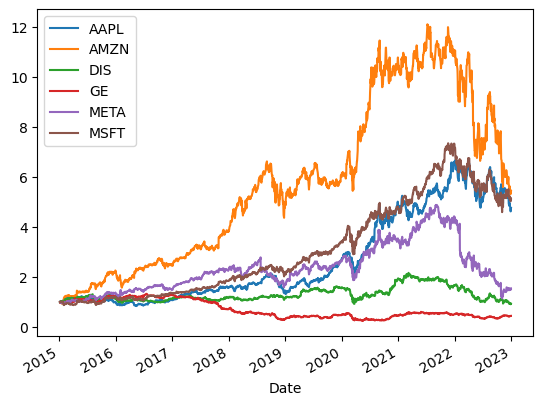

In [30]:
returns.add(1).cumprod().plot()